In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM, Dropout

from sklearn.preprocessing import MinMaxScaler

In [42]:
data_dir = 'NFLX.csv'
df = pd.read_csv(data_dir)

In [43]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-18,362.470001,370.970001,361.859985,363.440002,363.440002,7194700
1,2019-03-19,366.399994,366.959991,356.799988,358.779999,358.779999,7541400
2,2019-03-20,358.910004,375.899994,357.010010,375.220001,375.220001,10917200
3,2019-03-21,374.000000,379.000000,370.609985,377.869995,377.869995,8544000
4,2019-03-22,375.950012,376.429993,360.040009,361.010010,361.010010,8661300


In [76]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-11,608.080017,611.000000,600.369995,600.929993,600.929993,2500900
2024-03-12,600.210022,615.299988,596.270020,611.080017,611.080017,2821600
2024-03-13,613.369995,614.849976,607.210022,609.450012,609.450012,2192100
2024-03-14,615.000000,620.799988,607.349976,613.010010,613.010010,3120500
2024-03-15,622.919983,622.919983,603.820007,605.880005,605.880005,6670900


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2019-03-18 to 2024-03-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1259 non-null   float64
 1   High       1259 non-null   float64
 2   Low        1259 non-null   float64
 3   Close      1259 non-null   float64
 4   Adj Close  1259 non-null   float64
 5   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.9 KB


In [78]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,410.488856,416.661747,404.220136,410.546775,410.546775,6.975076e+06
std,118.848580,119.556455,117.779354,118.576599,118.576599,6.380195e+06
min,163.960007,172.059998,162.710007,166.369995,166.369995,1.144000e+06
25%,323.504989,328.940002,318.020004,323.009994,323.009994,3.887950e+06
50%,400.470001,408.000000,394.850006,400.470001,400.470001,5.457500e+06
75%,504.254989,509.850006,496.360001,502.979996,502.979996,7.856600e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,1.333875e+08


In [44]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace= True)

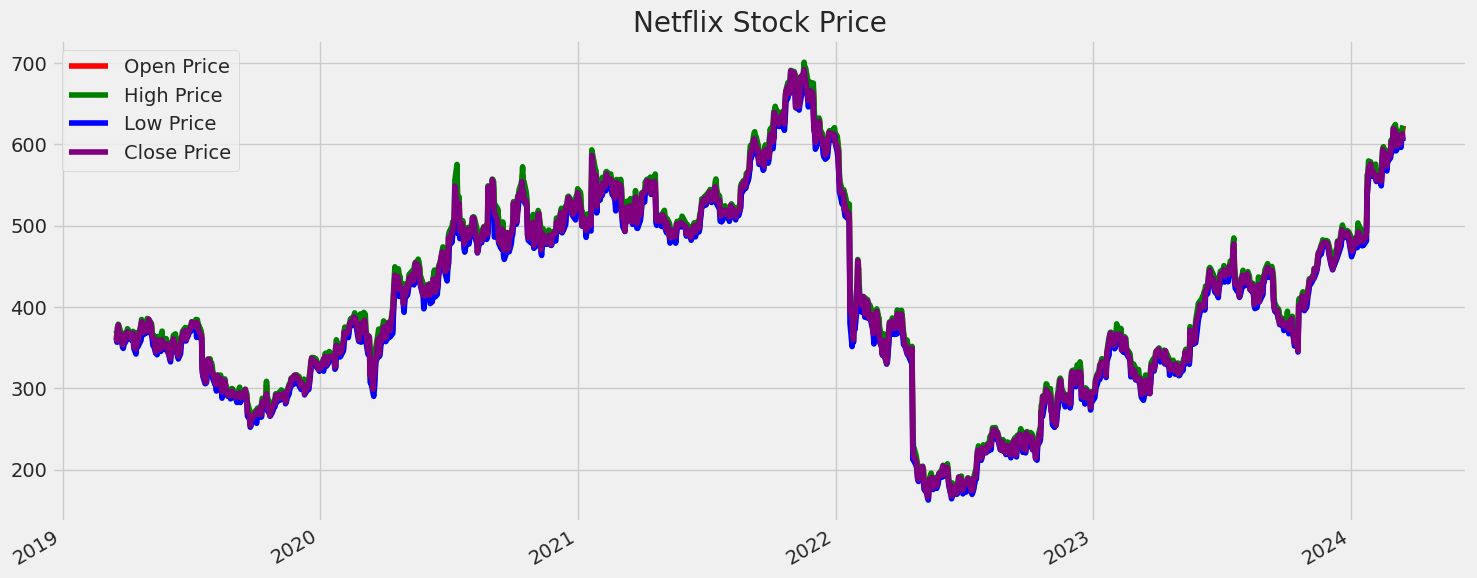

In [79]:
plt.figure(figsize=(15, 6))
df['Open'].plot(color='red')
df['High'].plot(color='green')
df['Low'].plot(color='blue')
df['Close'].plot(color='purple')
plt.ylabel(None)
plt.xlabel(None)
plt.title('Netflix Stock Price')
plt.legend(['Open Price', 'High Price', 'Low Price', 'Close Price'])
plt.tight_layout()
plt.show()

In [46]:
n_cols = 1
dataset = df[r'Close']
dataset = pd.DataFrame(dataset)
data = dataset.values

data.shape

(1259, 1)

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0, 1))
scaled_data = scaler.fit_transform(np.array(data))

In [48]:
train_size = int(len(data) * 0.75)
test_size = len(data) - train_size
print('Train Size:', train_size, 'Test Size:', test_size)

Train Size: 944 Test Size: 315


In [49]:
train_data = scaled_data[0:train_size, :]
train_data.shape

(944, 1)

In [50]:
x_train = []
y_train = []
time_steps = 60
n_cols = 1

for i in range(time_steps, len(train_data)):
  x_train.append(train_data[i-time_steps:i, :n_cols])
  y_train.append(train_data[i, :n_cols])
  if i <= time_steps:
    print('X_train:', x_train)
    print('y_train', y_train)

X_train: [array([[0.37514278],
       [0.36627199],
       [0.3975672 ],
       [0.40261174],
       [0.37051704],
       [0.38045384],
       [0.36853728],
       [0.3559735 ],
       [0.35833394],
       [0.36204599],
       [0.38184344],
       [0.38329019],
       [0.3871545 ],
       [0.38359478],
       [0.37904514],
       [0.37127847],
       [0.37756033],
       [0.37605653],
       [0.38315693],
       [0.3517285 ],
       [0.34740729],
       [0.36756642],
       [0.35858142],
       [0.36926066],
       [0.40160283],
       [0.41026425],
       [0.39568266],
       [0.38445136],
       [0.39686288],
       [0.39111397],
       [0.38865836],
       [0.40440113],
       [0.40487703],
       [0.41624153],
       [0.40413465],
       [0.38850604],
       [0.37691311],
       [0.37382929],
       [0.37057415],
       [0.34053532],
       [0.34120153],
       [0.35905732],
       [0.3672809 ],
       [0.35802942],
       [0.34596053],
       [0.35768673],
       [0.36808043],
   

In [51]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [52]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_cols))

In [53]:
x_train.shape, y_train.shape

((884, 60, 1), (884, 1))

In [55]:
model = Sequential([
    LSTM(50, return_sequences = True, input_shape=(x_train.shape[1], n_cols)),
    LSTM(64, return_sequences = False),
    Dense(32),
    Dense(16),
    Dense(n_cols)
])

model.compile(optimizer = 'adam', loss = 'mse', metrics = 'mean_absolute_error')

In [56]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_3 (LSTM)               (None, 64)                29440     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 42465 (165.88 KB)
Trainable params: 42465 (165.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:
history = model.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
28/28 [==============================] - 8s 65ms/step - loss: 0.0247 - mean_absolute_error: 0.1102
Epoch 2/100
28/28 [==============================] - 2s 65ms/step - loss: 0.0034 - mean_absolute_error: 0.0424
Epoch 3/100
28/28 [==============================] - 2s 65ms/step - loss: 0.0032 - mean_absolute_error: 0.0394
Epoch 4/100
28/28 [==============================] - 3s 95ms/step - loss: 0.0025 - mean_absolute_error: 0.0347
Epoch 5/100
28/28 [==============================] - 2s 62ms/step - loss: 0.0024 - mean_absolute_error: 0.0334
Epoch 6/100
28/28 [==============================] - 2s 61ms/step - loss: 0.0022 - mean_absolute_error: 0.0323
Epoch 7/100
28/28 [==============================] - 2s 61ms/step - loss: 0.0021 - mean_absolute_error: 0.0331
Epoch 8/100
28/28 [==============================] - 2s 63ms/step - loss: 0.0019 - mean_absolute_error: 0.0303
Epoch 9/100
28/28 [==============================] - 2s 63ms/step - loss: 0.0019 - mean_absolute_error: 0.0303
E

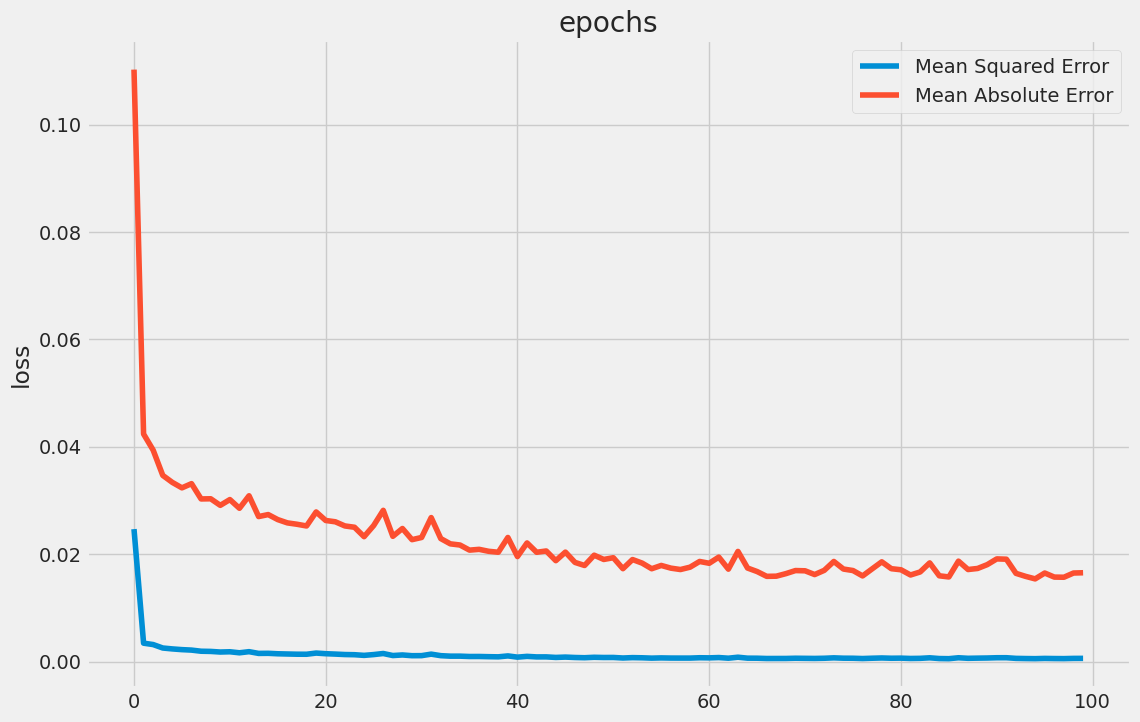

In [58]:
plt.figure(figsize=(12,8))
plt.plot(history.history["loss"])
plt.plot(history.history["mean_absolute_error"])
plt.legend(['Mean Squared Error', 'Mean Absolute Error'])
plt.title("Losses")
plt.title("epochs")
plt.ylabel("loss")
plt.show()

In [62]:
time_steps = 60
test_data = scaled_data[train_size - time_steps:, :]

x_test = []
y_test = []
n_cols = 1

for i in range(time_steps, len(test_data)):
  x_test.append(test_data[i-time_steps:i, 0:n_cols])
  y_test.append(test_data[i, 0:n_cols])

x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))

In [63]:
x_test.shape, y_test.shape

((315, 60, 1), (315, 1))

In [64]:
predictions = model.predict(x_test)

10/10 [==============================] - 2s 35ms/step


In [65]:
predictions = scaler.inverse_transform(predictions)
predictions.shape

(315, 1)

In [66]:
y_test = scaler.inverse_transform(y_test)

rmse = np.sqrt(np.mean(y_test - predictions) **2).round(2)
rmse

6.29

In [68]:
preds_acts = pd.DataFrame(data={'Predictions': predictions.flatten(), 'Actuals':y_test.flatten()})
preds_acts

,Predictions,Actuals
0,313.516693,320.339996
1,316.599548,317.829987
2,315.582642,290.410004
3,294.210144,290.709991
4,287.644897,288.299988
...,...,...
310,594.593323,600.929993
311,591.449402,611.080017
312,602.411316,609.450012
313,599.177307,613.010010


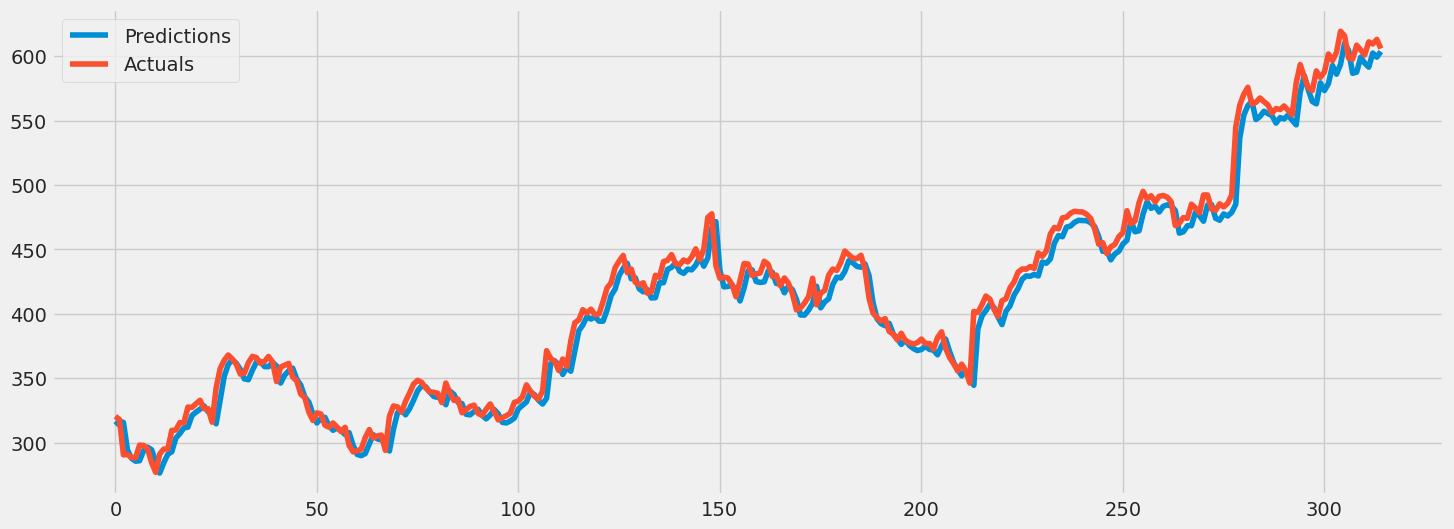

In [69]:
plt.figure(figsize=(16, 6))
plt.plot(preds_acts['Predictions'])
plt.plot(preds_acts['Actuals'])
plt.legend(['Predictions', 'Actuals'])
plt.show()

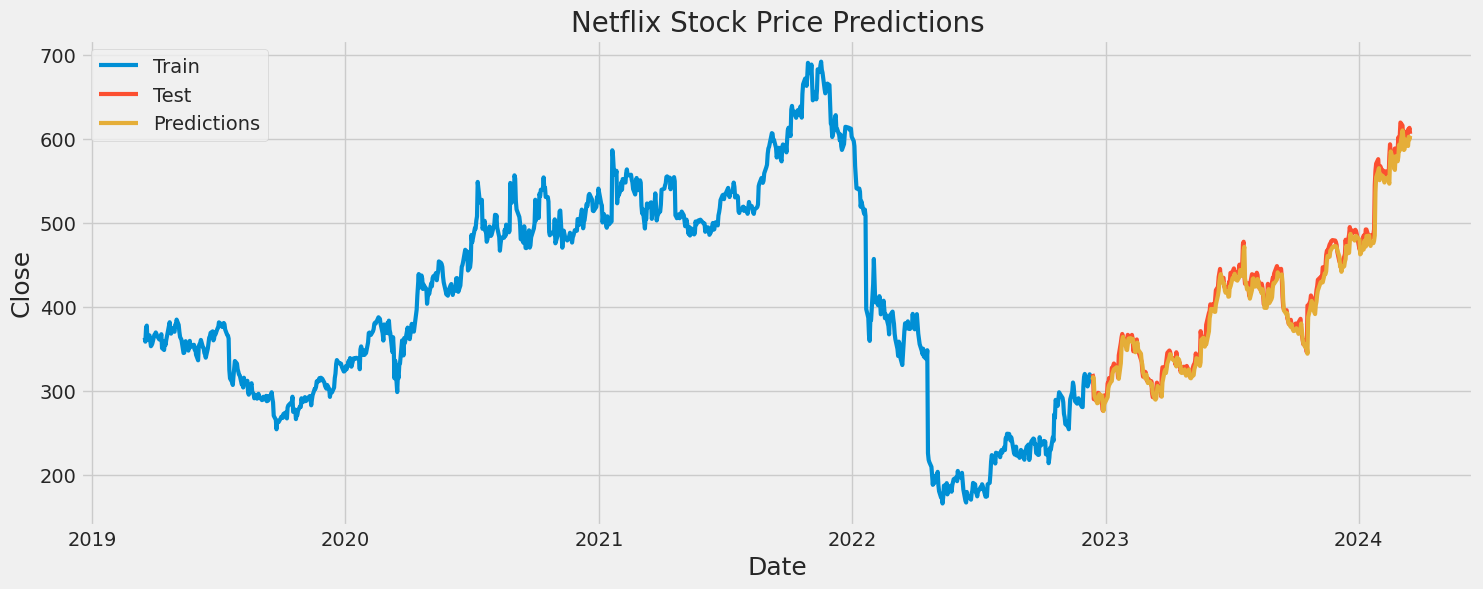

In [70]:
train = dataset.iloc[:train_size, 0:1]
test = dataset.iloc[train_size:, 0:1]
test ['Predictions'] = predictions

plt.figure(figsize = (16, 6))
plt.title('Netflix Stock Price Predictions', fontsize = 20)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close', fontsize = 18)
plt.plot(train[r'Close'], linewidth = 3)
plt.plot(test[r'Close'], linewidth = 3)

plt.plot(test["Predictions"], linewidth= 3)
plt.legend(['Train', 'Test', 'Predictions'])

In [75]:
abs_error = np.abs(predictions - y_test)
abs_error_ratio = abs_error / y_test
mape = np.mean(abs_error_ratio)
mape *= 100

print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape))


Mean Absolute Percentage Error (MAPE): 2.08%
